### Topic: statistical inference: 
- parameter estimation
- hypothesis testing

# Parameter estimation by optimization

Optimal parameters are computed directly from the data.

Python packages to do statistical inference:
- scipy.stats
- statsmodels
- hacker statistics with numpy

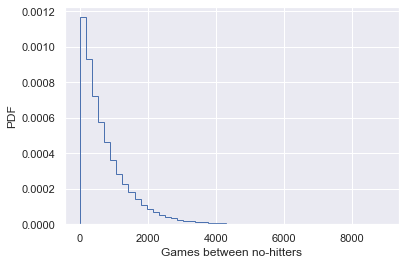

In [3]:
# How often do we get no-hitters in MLB:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nohitter_times = [843,1613,1101,215,684,814,278,324,161,219,545,715,966,624,29,450,107,20,91,1325,124,1468,104,1309,429,62,1878,1104,123,251,93,188,983,166,96,702,23,524,26,299,59,39,12,2,308,1114,813,887,645,2088,42,2090,11,886,1665,1084,2900,2432,750,4021,1070,1765,1322,26,548,1525,77,2181,2752,127,2147,211,41,1575,151,479,697,557,2267,542,392,73,603,233,255,528,397,1529,1023,1194,462,583,37,943,996,480,1497,717,224,219,1531,498,44,288,267,600,52,269,1086,386,176,2199,216,54,675,1243,463,650,171,327,110,774,509,8,197,136,12,1124,64,380,811,232,192,731,715,226,605,539,1491,323,240,179,702,156,82,1397,354,778,603,1001,385,986,203,149,576,445,180,1403,252,675,1351,2983,1568,45,899,3260,1025,31,100,2055,4043,79,238,3931,2351,595,110,215,0,563,206,660,242,577,179,157,192,192,1848,792,1693,55,388,225,1134,1172,1555,31,1582,1044,378,1687,2915,280,765,2819,511,1521,745,2491,580,2072,6450,578,745,1075,1103,1549,1520,138,1202,296,277,351,391,950,459,62,1056,1128,139,420,87,71,814,603,1349,162,1027,783,326,101,876,381,905,156,419,239,119,129,467]

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

sns.set()
# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [2]:
import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

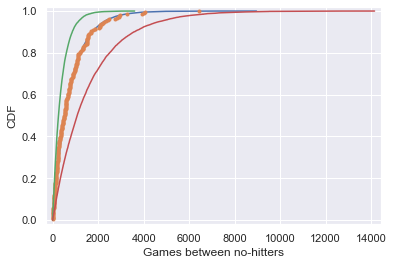

In [6]:
# Do the data (ECDF) agree with the theoretical CDF?

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# If you plt.show now, it will show the plot of only one CDF

# Sampling from exponential distributions where tau is different (twice as large or half as large). Comparing it to the optimal tau.

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2 * tau, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()


We can tell that the original tau (computed as the mean of the data) was the optimal parameter for the exponential distribution.


## Least squares

![residual](residual.png)

(data retrieved from data.gov; image by by datacamp.com)

Minimize the residuals. 

**Least squares** - process of finding parameters for which the sum of the squares of the residuals is minimal.

`np.polyfit()`



In [ ]:
# Linear regressions with polyfit example:

# 1 is the degree of the polynomial, for linear
slope, intercept = np.polyfit(total_votes, dem_share, 1)

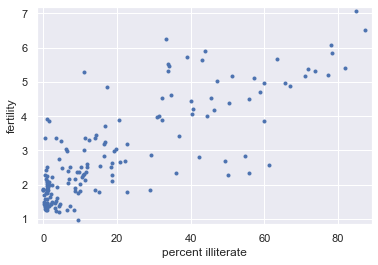

0.8041324026815347


In [16]:
# EDA of literacy/fertility data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pearson correlation coefficient from Part 1
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]


df_female_literacy = pd.read_csv('female_literacy_fertility.csv')
df_female_literacy

literacy = df_female_literacy['female literacy']
# calculated values of illiteracy, fertility match what the course video gives us
illiteracy = np.array([100 - x for x in literacy])
fertility = df_female_literacy['fertility']

# Plot the illiteracy rate versus fertility
sns.set()
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


slope = 0.049798548090634255 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


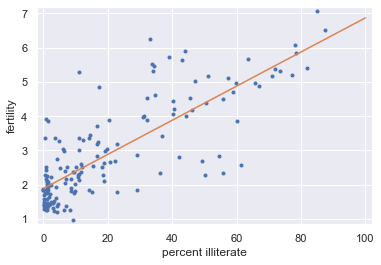

In [28]:
# redoing the scatter plot from the previous input:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


### How are these parameters optimal?

The calculated value of the slope from polyfit is 0.0497985...

We wanted to see empirically if maybe we can find another slope somewhere around that point that would be better (i.e. RSS will be lower).

We are doing "hacker statistics" to find out, for what value of the slope
the RSS (residual sum of squares) will be minimal.


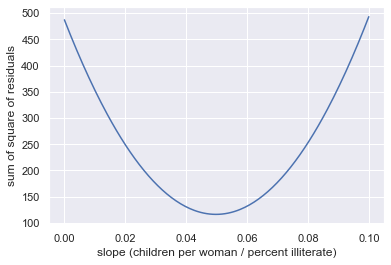

In [29]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

## Anscombe's quartet: importance of EDA

Do graphical EDA before parameter estimation because parameter estimation may not be meaningful.

EDA: See the outliers, understand what causes the outliers.

![dataset 4](Anscombe_dataset4.png)

Dataset 4: need some intermediate x, y values (between the cluster and the lonely outlier) to understand if there may be a linear relation between x and y.

0.5000909090909094 3.000090909090908


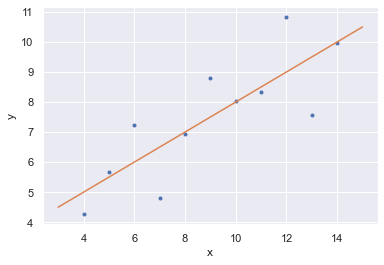

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Doing linear regression on Anscombe dataset1:

# x, y - contain Anscombe dataset1 data
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

slope, intercept = np.polyfit(x, y, 1)

print(slope, intercept)

# Generate theoretical x and y data: x_theor, y_theor
# x_theor contains 3, 15 because the x values in the real Anscombe dataset go from 4 to 14
x_theor = np.array([3, 15])
y_theor = slope * x_theor + intercept

sns.set()
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [18]:
anscombe_x  = [np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]

anscombe_y = [np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82, 5.68]),
 np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42, 5.73]),
 np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56, 7.91, 6.89])]


In [19]:
# Checking that the slopes and intercepts are the same for all the datasets
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.0009090909090905
slope: 0.49972727272727313 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.0017272727272735


# Bootstrap confidence intervals

Goal: find out what the summary statistics (the mean, e.g. speed of light) would be if we repeat the experiment an infinite number of times.

Resampling, sampling without replacement. Do n times. n = total number of measurements (elements in the original dataset)

**Bootstrap sample** - each resampled array.

**Bootstrap replicate** - statistic computed from a resampled array ("replica" of original data)
.

`np.random.choice([1, 2, 3, 4, 5], size=5)` for resampling

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv('michelson_speed_of_light.csv')
michelson_speed_of_light = df['velocity of light in air (km/s)']

bs_sample = np.random.choice(michelson_speed_of_light, size=len(michelson_speed_of_light))
bsr_mean = np.mean(bs_sample)
bsr_median = np.median(bs_sample)
bsr_stddev = np.std(bs_sample)

print(bsr_mean, bsr_median, bsr_stddev)


299848.8 299850.0 83.0093970584054


In [6]:
import pandas as pd

df_rainfall = pd.read_csv('sheffield_weather_station.csv', skiprows=8, delim_whitespace=True)
grouped = df_rainfall.groupby(["yyyy"]).sum()
rainfall = grouped['rain']

# excluding data from 2016 because it is not a complete year (1 - 6: January - June) 
rainfall = grouped['rain'][:-1]

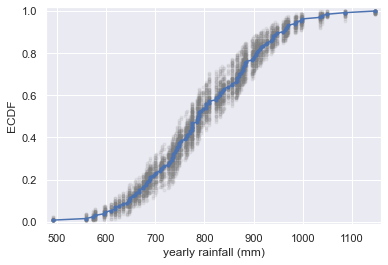

133

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # number of data points
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

sns.set()

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    # alpha - opacity
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')


plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

plt.show()

In [5]:
# Bootstrap replicate calculation function
# func could be 'mean', 'median', etc.
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, size=len(data))

    return func(bs_sample)

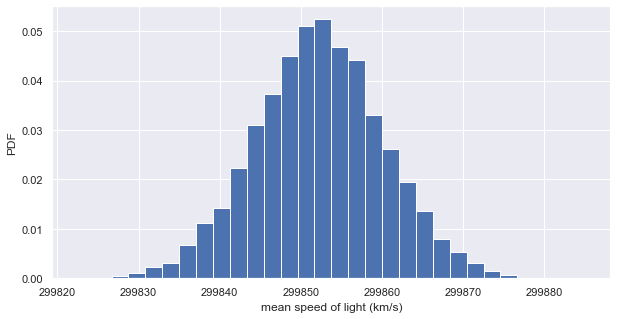

[299836.6    299868.0025]


In [80]:
from matplotlib.ticker import FormatStrFormatter

# Generating an array of replicates (means)

length = 10000
bs_replicates = np.empty(length)
for i in range(length):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

fig, ax = plt.subplots(figsize=(10,5)) 
_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('mean speed of light (km/s)')

# https://stackoverflow.com/a/44707254
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))
_ = plt.ylabel('PDF')

plt.show()

# 95% confidence interval: 95% of the means will lie in this interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)


### Confidence interval of a statistic
**p% confidence interval** - if we repeated the measurements infinitely, p% of the observed values would lie within the p% confidence interval.

In [4]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

It can be shown theoretically that under not-too-restrictive conditions, the value of the **mean will always be Normally distributed**. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the **standard error of the mean**, or **SEM**, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, 
```python
sem = np.std(data) / np.sqrt(len(data))
```

10.51054915050619
10.452352324587793


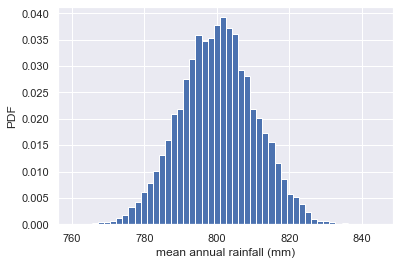

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# rainfall is initialized above, re-run that code

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

sns.set()
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [10]:
# 95% confidence interval:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.67665414, 820.84648496])

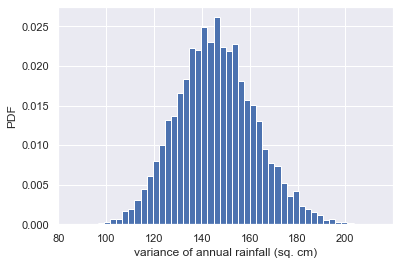

In [12]:
# Looking at the distribution of the Variance:

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = [x/100 for x in bs_replicates]

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [663.08565737 872.46543825] games


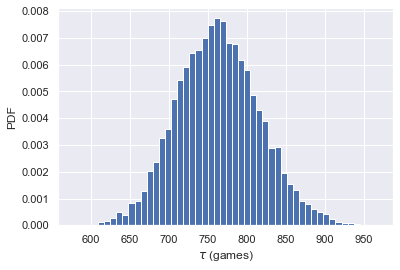

In [15]:
# Confidence interval on rate of no-hitters

nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Pairs bootstrap

When there are 2 variables associated with each datapoint (e.g. each county has a total number of votes and a Democrat share), we can select the indices. To generate a bootstrap sample, we select the total votes and a Democrat share for each index. The bootstrap sample will consist of (x, y) pairs (total_votes, dem_share)

```python
indices = np.arange(len(total_votes))
bs_indices = np.random.choice(inds, len(inds))
bs_total_votes = total_votes[bs_indices]
bs_dem_share = dem_share[bs_inds]
bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)
```

In [18]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


[0.0438971 0.0552161]


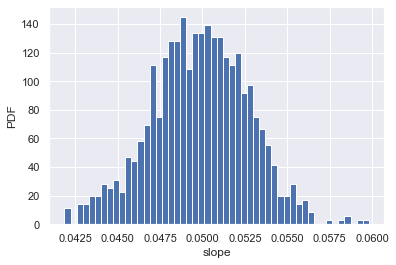

In [19]:
# illiteracy, fertility are defined above. Re-run that code

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

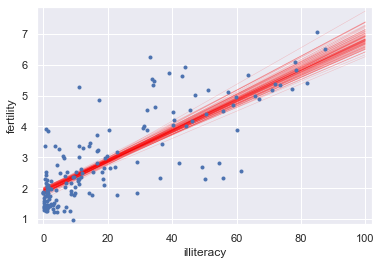

In [20]:
#  plot the line you would get from each bootstrap replicate of the slope and intercept

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Introduction to hypothesis testing

**Hypothesis testing** -- assess how reasonable it is that our observed data are actually described by the model (hypothesis).

What exactly do we test? -> the **Test statistic** - a single number.

Null hypothesis - (initial) hypothesis, that the 2008 voting data from the 2 states (PA, OH) follow the same distributions.

We are simulating the null hypothesis.

Concatenate the data from two states.

Scramble the data (permute). 

This is sort of like redoing the election assuming there is no difference between the two states

```python
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_perm = np.random.permutation(dem_share_both)
# first 67 counties (number of counties in PA):
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
# the rest of the counties 
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

```



In [6]:
# Helper function to do permutation:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

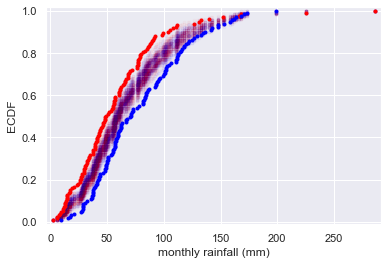

In [6]:
# Visualizing permutation sampling

# Hypothesis: June and November rainfall are identically distributed

# To test the hypothesis, we
# - generate 50 permutation samples
# - plot their ECDFs
# - plot ECDFs of the real data (one for June, one for November)

# Conclusion: after the plotting:
# Since none of the permutation sample ECDFs overlap with the the ECDFs of the observed data. Therefore, the data do not corroborate the hypothesis.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

sns.set()
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Difference in means between the states (PA, OH) - is the **test statistic**

![test_statistic_PA_OH](test_statistic_PA_OH.png)

(Image from the course, datacamp.com)

Red line in the figure - the actual difference of the means (from the observed data).

**p-value** - probability of getting a value for the test statistic at least as extreme (large or small) as the observed value, under the assumption that the null hypothesis is true.

Prerequisites for existence of p-value:
- null hypothesis
- test statistic

**Null hypothesis significance testing (NHST)** - checking if the data are statistically significantly different than what we would observe under the null hypothesis.

If p-value small => data statistically significantly different.

In [4]:
# Generating permutation replicates

# func is a function of 2 datasets - to compute the test statistic

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [27]:
# frog tongue impact data:
import pandas as pd

df_frog_from_csv = pd.read_csv('frog_tongue.csv', skiprows=14)
df_frog_from_csv

#df_frog_from_csv['ID'].value_counts() 20 each of I, II, III, IV

# The data in the videos (or in the Python code below) is as follows:
# label 'A' in videos => label 'II' in CSV
# label 'B' in videos => label 'IV' in CSV

df_frog_from_csv[df_frog_from_csv['ID'] == 'IV'] 


,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
60,2013_05_27,IV,2,172,26,1.28,-456,462,3.40,-0.050,133,0,0.88,1297,-3440
61,2013_05_27,IV,3,142,20,1.05,-193,250,1.44,-0.047,57,74,0.83,2498,-3400
62,2013_05_27,IV,4,37,55,0.28,-236,743,1.76,-0.119,51,44,0.54,735,-4647
63,2013_05_30,IV,1,453,38,3.37,-225,844,1.68,-0.110,142,108,0.48,3177,-1581
64,2013_05_30,IV,2,355,31,2.64,-217,728,1.61,-0.023,174,39,0.98,2037,-1245
65,2013_05_30,IV,3,22,33,0.17,-161,472,1.20,-0.052,56,4,0.02,397,-2866
66,2013_06_03,IV,1,502,74,3.74,-139,959,1.04,-0.089,65,77,0.91,7713,-2141
67,2013_06_11,IV,1,273,26,2.03,-264,844,1.97,-0.160,124,81,0.29,2205,-2136
68,2013_06_11,IV,2,720,27,5.36,-342,1515,2.55,-0.226,137,0,0.83,5259,-2497
69,2013_06_11,IV,3,582,33,4.34,-231,279,1.72,-0.033,60,4,0.03,9705,-3847


In [25]:
# Data frame made by copying the respective arrays from the exercises in the video.

dict_input = {'ID': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B'], 
       'impact_force': [1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468]}
df_frog = pd.DataFrame(data=dict_input)
df_frog


,ID,impact_force
0,A,1.612
1,A,0.605
2,A,0.327
3,A,0.946
4,A,0.541
5,A,1.539
6,A,0.529
7,A,0.628
8,A,1.453
9,A,0.297


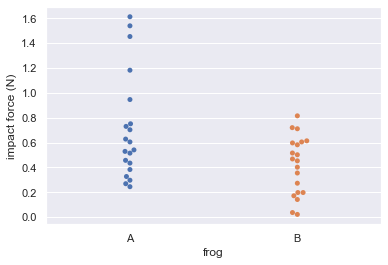

In [26]:
# EDA to decide if it is worth to do hypothesis testing

# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df_frog)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


 Conclusion (from EDA): Hard to draw a conclusion from EDA alone. But the impacts two frogs do not look completely different. So, we decided to go ahead with hypothesis testing.

In [2]:
import numpy as np

# Force of Frog A
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

# Force of Frog B
force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [7]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
# draw_perm_reps is defined above
# It calls permutation_sample -> also defined above
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0051


`p-value = 0.0051` is statistically significant. Any p-value < 0.01 is statistically significant. This means that by using permutation sampling we tested and **disproved** the null hypothesis (`that the distributions of strike forces for the two frogs are identical`): the two samples must come from different populations. The difference is not due to chance (~ is "statistically significant")

## Hypothesis Testing Pipeline:
1. Clearly State the null hypothesis
1. Define Test statistic
1. Generate many sets of simulated data assuming the null hypothesis is true.
1. Compute test statistic for each simulated data set.
1. p-value is the fraction of the simulated data set, for which the test statistic is at least as extreme as the real data

## Bootstrap hypothesis tests:

### Another experiment: Michelson and Newcomb

Idea: could Michelson have gotten Newcomb's reported mean value (which is **higher** than Michelson's: Michelson: 299582, Newcomb: 299860) from his experiment, had he repeated the experiments many times?

1. Shift the Michelson data, so that the mean equals Newcomb's mean (shift entire data set)

```python
newcomb_value = 299860
michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value

# Test statistic:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

diff_observed = diff_from_newcomb(michelson_speed_of_light)

# Passing the **shifted** data into function - because we use those data to simulate the null hypothesis
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)

# <= used because mean of michelson < mean of Newcomb's
p_value = np.sum(bs_replicates <= diff_observed) / 10000
```

In [19]:
print(np.mean(michelson_speed_of_light))



newcomb_value = 299860

def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value




299852.4


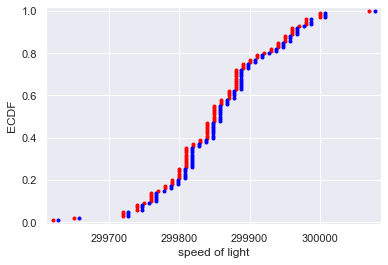

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # number of data points
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

sns.set()

# Compute and plot ECDF from original data
x, y = ecdf(michelson_speed_of_light)
_ = plt.plot(x, y, marker='.', color='red', linestyle='none')

x_shifted, y_shifted = ecdf(michelson_shifted)
_ = plt.plot(x_shifted, y_shifted, marker='.', color='blue', linestyle='none')

plt.margins(0.02)
_ = plt.xlabel('speed of light')
_ = plt.ylabel('ECDF')

plt.show()

In [6]:
## One sample bootstrap hypothesis test

# Hypothesis: means of Frog B and Frog C are the same.

force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)



p =  0.0053


Low p value (0.0053) is statistically significant. It means that the null hypothesis (Frog B and Frog C have the same mean impact force) is false

In [10]:
## A two-sample bootstrap hypothesis test for difference of means
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

forces_concat = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468])

empirical_diff_means = 0.28825000000000006

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0039


Low p-value => statistically significant: the means of the two data sets are different